# Inventory Organizational Content

Being able to retrieve, display, analyze, and export the content within an organization Portal are important tasks for any admin. Here we will leverage the [ContentManager](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#contentmanager) and [UserManager](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#usermanager) classes of the GIS module, as well as some functionality from the [Pandas](https://pandas.pydata.org/docs/index.html) library, to accomplish those tasks.

In this page we are going to observe how the following can be accomplished:
- [Import Libraries](#Import-Libraries)
- [Connect to ArcGIS Online](#Connect-to-ArcGIS-Online)
- [Querying Content](#Querying-Content)
    - [Searching for Content](#Searching-for-Content)
    - [Displaying Content](#Displaying-Content)
    - [Sorting Content](#Sorting-Content)
- [Querying Organization Content](#Querying-Organization-Content)
    - [Searching for Organization Members](#Searching-for-Organization-Members)
    - [Getting Member Content](#Getting-Member-Content)
    - [Compiling Organization Content](#Compiling-Organization-Content)
- [Analyzing Organization Content with Pandas](#Analyzing-Organization-Content-with-Pandas)
    - [Filtering the Dataset](#Filtering-the-Dataset)
    - [Accessing Content by ID](#Accessing-Content-by-ID)
- [Exporting Data](#Exporting-Data)

## Import Libraries

In [1]:
import pandas as pd
from IPython.display import display

import arcgis
from arcgis.gis import GIS

## Connect to ArcGIS Online

<User username:your_username>
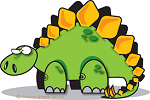

In [2]:
profile_name = "your_profile_name"

gis = GIS(profile=profile_name)
gis.users.me

## Querying Content

To search for content within our organization, we can access the [ContentManager](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.ContentManager) class via `gis.content()`. 

Using the [`advanced_search()`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.ContentManager.advanced_search) method, we can query content belonging to a user by providing the string `"owner: < username >"`. By setting the `return_count` parameter of `advanced_search()` to `True`, we can simply return a single integer representing the number of items which that user owns.

Let's return the number of items that belong to the user currently logged in:

In [3]:
qe = f"owner: {gis.users.me.username}"
my_content_count = gis.content.advanced_search(query=qe,return_count=True)
print(my_content_count, 'items found for current user')

265 items found for current user


### Searching for Content

If we leave the `return_count` parameter as its default value `False`, then we will receive a response dictionary containing metadata about the query as well as a list of returned items in the `results` field.

By setting the `max_items` parameter, we can limit the number of items that are returned in the `results` field.

In [4]:
max_items = 3
user_content = gis.content.advanced_search(query=qe, max_items=max_items)
user_content

{'query': 'owner: your_username',
 'total': 265,
 'start': 1,
 'num': 3,
 'nextStart': 4,
 'results': [<Item title:"9ed755d0f0b14b9bb6910fba189051d1" type:Shapefile owner:your_username>,
  <Item title:"Airborne" type:WMTS owner:your_username>,
  <Item title:"ArchiveDataScript" type:Notebook owner:your_username>]}

### Displaying Content

<Item title:"9ed755d0f0b14b9bb6910fba189051d1" type:Shapefile owner:your_username>

<Item title:"Airborne" type:WMTS owner:your_username>
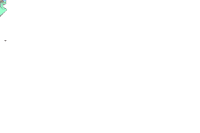

<Item title:"ArchiveDataScript" type:Notebook owner:your_username>
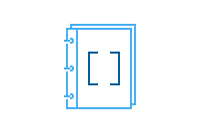

In [5]:
# Displaying the result items through IPython.display.display()

for item in user_content['results']:
    display(item)

It is also possible to have these items returned as dictionary objects by setting the `as_dict` parameter:

In [6]:
# return items as a dictionary with as_dict=True

user_content_as_dict = gis.content.advanced_search(
    query=qe, max_items=max_items,as_dict=True)
user_content_as_dict['results']

[{'id': 'c1f7fec006eb4971a07b6d12ee967134',
  'owner': 'your_username',
  'created': 1646757719000,
  'isOrgItem': True,
  'modified': 1646757719000,
  'guid': None,
  'name': 'af3ba6.zip',
  'title': '9ed755d0f0b14b9bb6910fba189051d1',
  'type': 'Shapefile',
  'typeKeywords': ['ArcGIS Desktop', 'Data', 'Layer', 'Shapefile', 'Template'],
  'description': None,
  'tags': ['FGDB'],
  'snippet': None,
  'thumbnail': None,
  'documentation': None,
  'extent': [],
  'categories': [],
  'spatialReference': None,
  'accessInformation': None,
  'licenseInfo': None,
  'culture': 'english (united states)',
  'properties': None,
  'advancedSettings': None,
  'url': None,
  'proxyFilter': None,
  'access': 'private',
  'size': -1,
  'subInfo': 0,
  'appCategories': [],
  'industries': [],
  'languages': [],
  'largeThumbnail': None,
  'banner': None,
  'screenshots': [],
  'listed': False,
  'ownerFolder': None,
  'protected': False,
  'numComments': 0,
  'numRatings': 0,
  'avgRating': 0,
  'numV

### Sorting Content

The `sort_field` and `sort_order` parameters of the [`advanced_search()`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.ContentManager.advanced_search) method can be used to sort the returned content server side.

Possible values for `sort_order` are `"asc"` for ascending or increasing order and `"desc"` for descending or decreasing order. Default values for the `sort_field` and `sort_order` parameters are `"title"` and `"asc"`, respectively.

In this next example we'll search for the last 3 items that the current user modified by setting `sort_field="modified"` and `sort_order="desc"`:

In [7]:
content_last_modified = gis.content.advanced_search(
    query=qe, max_items=max_items, sort_field="modified", sort_order="desc")

for item in content_last_modified['results']:
    display(item)

<Item title:"USA states from Pro" type:Web Map owner:your_username>

<Item title:"9ed755d0f0b14b9bb6910fba189051d1" type:Shapefile owner:your_username>

<Item title:"MN_wind_turbines" type:Web Map owner:your_username>

Here we return the first 3 items that the user created by setting `sort_field="created"` and `sort_order="asc"`:

<Item title:"SubDiv_PB11_PG48_Parcels" type:File Geodatabase owner:your_username>

<Item title:"Manage_and_Allocate_Credits" type:Notebook owner:your_username>
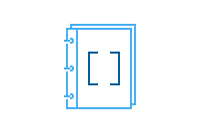

<Item title:"guinea_power_plants_southern_gdb" type:File Geodatabase owner:your_username>
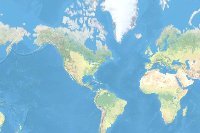

In [8]:
content_first_created = gis.content.advanced_search(query=qe, max_items=max_items, sort_field="created", sort_order="asc")

for item in content_first_created['results']:
    display(item)

## Querying Organization Content

### Searching for Organization Members

We can search for a list of the members within the organization by using the [UserManager](https://developers.arcgis.com/python/api-reference/arcgis.gis.server.html#arcgis.gis.server.UserManager) class within the GIS module. Here we access the UserManager by calling `gis.users`, and use the [`search()`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.UserManager.search) method to return a list of organization members. The `search()` method will return all users in the organization if no parameters are provided:

In [9]:
# View UserManager object
gis.users

<UserManager @ https://your_org.maps.arcgis.com>

In [10]:
org_users = gis.users.search()
print(f'{len(org_users)} users found')
org_users[:3]

42 users found


[<User username:your_username2>,
 <User username:your_username3>,
 <User username:your_username4>]

<User username:your_username3>
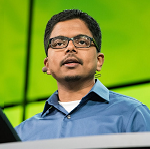

In [11]:
# Display a misc member
org_member = org_users[1]
org_member

### Getting Member Content

Similarly to above, we can set `return_count=True` and see how many items this user has:

In [12]:
# See the number of member items
qe = "owner: " + org_member.username
member_content_count = gis.content.advanced_search(
    query=qe, max_items=-1, return_count=True)
print(f"Org member has {member_content_count} items")

Org member has 83 items


In [13]:
# Return <max_items> items from member
max_items = 3

member_content = gis.content.advanced_search(query=qe, max_items=max_items)
member_content['results']

[<Item title:"advanced search" type:Notebook owner:your_username3>,
 <Item title:"Analyzing historic earthquake data" type:Notebook owner:your_username3>,
 <Item title:"atma-ge" type:Notebook owner:your_username3>]

### Compiling Organization Content

If we return all items for each user in the organization, we can compile those items into a single list representing all of the organizations content.

We can remove the item limit for each query by setting `max_items=-1` in the `advanced_search()` function:

In [14]:
# return content for each user in org, compile into a single list

org_content = []

for user in org_users:
    qe = f"owner: {user.username}"
    user_content = gis.content.advanced_search(query=qe, max_items=-1)['results']
    org_content += user_content
    
print(f"{len(org_content)} items found in org")

5592 items found in org


## Analyzing Organization Content with Pandas

Let's put our compiled list into a pandas [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) to easily view and filter our data

In [15]:
# Create DataFrame

content_df = pd.DataFrame(org_content)
content_df.head()

,id,owner,created,isOrgItem,modified,guid,name,title,type,typeKeywords,...,contentOrigin,layers,tables,size,commentsEnabled,itemControl,appProxies,serviceProxyParams,contentStatus,sourceUrl
0,a3d68f38dcc74c7b8b08aa887080252a,your_username2,1616734025000,True,1616734026000,None,None,BeaverCreek_Flowlines,Feature Service,"[ArcGIS Server, Data, Feature Access, Feature ...",...,self,"[<FeatureLayer url:""https://pythonapi.playgrou...",[],101.0,True,admin,NaN,NaN,NaN,NaN
1,1693efe3f7ed4f619425d357b85a0ba5,your_username2,1617343861000,True,1617350206000,None,building.dlpk,building,Deep Learning Package,"[Deep Learning Package, dlpk, Raster]",...,self,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2c8abe7656cc48ca9410f3d95969c5fa,your_username2,1616731025000,True,1616731025000,None,composite_3bands_6BC_8BC_8bitunsigned.tif,composite_3bands_6BC_8BC_8bitunsigned,Image,"[Data, Image, tif]",...,self,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3d3e1366cc2a46e7be58899dd4b9eb32,your_username2,1616173554000,True,1616210931000,None,3d3e1366cc2a46e7be58899dd4b9eb32.ipynb,Extracting Building Footprints From Drone Data,Notebook,"[Notebook, Python]",...,self,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e782b8d6f10a4154ae05c5f4e8518461,your_username2,1616052680000,True,1616052740000,None,None,Google Maps,Web Map,"[ArcGIS Online, Explorer Web Map, Map, Online ...",...,self,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can use the pandas function [`value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html#pandas.Series.value_counts) to see how many occurrences there are of each value for a particular column. Here we return the top 10 most frequently occurring item types and the number of instances they have:

In [16]:
# use value_counts() to see how many items you have with a particular key:value pair
content_df.type.value_counts().head(10)

Feature Service       1245
CSV                   1117
Feature Collection     602
Notebook               552
File Geodatabase       373
Web Map                356
Shapefile              204
PDF                    165
StoryMap               136
Service Definition     129
Name: type, dtype: int64

Another [`value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html#pandas.Series.value_counts) example where we see the distribution of access levels for each of the items in the organization:

In [17]:
content_df.access.value_counts()

private    4126
public      715
org         609
shared      142
Name: access, dtype: int64

Using the [`value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html#pandas.Series.value_counts) function in conjunction with the [`groupby()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) operation allows for an additional level of analysis. Here we see the breakdown of item types that each user has created:

In [18]:
content_df.groupby('owner').type.value_counts().head(10)

owner           type              
ArcGISPyAPIBot  CSV                   729
                Notebook               31
                Feature Service        12
                File Geodatabase        4
                Web Map                 4
                Scene Package           2
                Scene Service           1
                Service Definition      1
                Shapefile               1
                StoryMap                1
Name: type, dtype: int64

In [19]:
# Viewing the number item types per access level within the org
content_df.groupby('type').access.value_counts().head(10)

type                   access 
API Key                private      11
Administrative Report  private       2
Application            private       8
                       public        1
CSV                    private    1106
                       public        9
                       shared        2
CSV Collection         private      10
                       public        1
Code Attachment        private       6
Name: access, dtype: int64

### Filtering the Dataset

We can choose which columns we'd like to view, and the order we'd like to view them in, by providing the DataFrame with a list of strings matching column names:

In [20]:
view_columns = ['id','title','owner','type','access']
content_df[view_columns].head()

,id,title,owner,type,access
0,a3d68f38dcc74c7b8b08aa887080252a,BeaverCreek_Flowlines,your_username2,Feature Service,private
1,1693efe3f7ed4f619425d357b85a0ba5,building,your_username2,Deep Learning Package,private
2,2c8abe7656cc48ca9410f3d95969c5fa,composite_3bands_6BC_8BC_8bitunsigned,your_username2,Image,private
3,3d3e1366cc2a46e7be58899dd4b9eb32,Extracting Building Footprints From Drone Data,your_username2,Notebook,private
4,e782b8d6f10a4154ae05c5f4e8518461,Google Maps,your_username2,Web Map,private


Creating and applying Boolean masks is a very efficient way to the filter the rows of a DataFrame. By using standard operators such as `<`, `>`, `==` and `!=` on pandas Series objects (e.g. the columns of our DataFrame), we can create a new Series of `True` and `False` values, called a mask. When this mask is applied to the original DataFrame, a new DataFrame will be returned with only the rows corresponding to where the mask had a `True` value.

Let's create a mask to represent all items with public level access:

In [21]:
filter_value = 'public'
filter_column = 'access'
row_filter = content_df[filter_column]==filter_value
row_filter.head()

0    False
1    False
2    False
3    False
4    False
Name: access, dtype: bool

Applying this mask to our DataFrame, we return all fields for objects which have `access=='public'`:

In [22]:
print(len(content_df[row_filter]), 'objects in filtered DataFrame')
content_df[row_filter].head()

715 objects in filtered DataFrame


,id,owner,created,isOrgItem,modified,guid,name,title,type,typeKeywords,...,contentOrigin,layers,tables,size,commentsEnabled,itemControl,appProxies,serviceProxyParams,contentStatus,sourceUrl
52,6fd3252f1ad044869dd4f949ea4b20cc,your_username3,1555049137000,True,1555049257000,None,None,hu_indy_18p,Feature Service,"[ArcGIS Server, Data, Feature Access, Feature ...",...,self,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,1d3614ec5cc24382878533f8454c24a3,your_username3,1630112960000,True,1630112990000,None,1d3614ec5cc24382878533f8454c24a3.ipynb,intro to notebooks,Notebook,"[Notebook, Python]",...,self,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,67ec03dba0d44bb1924cd8b3aebf2db4,your_username3,1613548980000,True,1613548981000,None,KMZ_ContentType_Region_UnitedNations-3.zip,KMZ_ContentType_Region_UnitedNations-3,KML Collection,[KML Collection],...,self,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,8df836df4d544067b715c296608beea4,your_username3,1591834702000,True,1591860089000,None,None,Lambda requests on a map,Web Map,"[ArcGIS Online, Explorer Web Map, Map, Online ...",...,self,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,8443e3c2473549f0b464a6a3f295acf9,your_username3,1591655624000,True,1591655626000,None,None,lambda-credit-counter,Application,"[Application, Registered App]",...,self,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can apply both the column filter and Boolean mask at the same time to reduce the amount of information displayed:

In [23]:
content_df[row_filter][view_columns].head()

,id,title,owner,type,access
52,6fd3252f1ad044869dd4f949ea4b20cc,hu_indy_18p,your_username3,Feature Service,public
62,1d3614ec5cc24382878533f8454c24a3,intro to notebooks,your_username3,Notebook,public
65,67ec03dba0d44bb1924cd8b3aebf2db4,KMZ_ContentType_Region_UnitedNations-3,your_username3,KML Collection,public
67,8df836df4d544067b715c296608beea4,Lambda requests on a map,your_username3,Web Map,public
68,8443e3c2473549f0b464a6a3f295acf9,lambda-credit-counter,your_username3,Application,public


Another example where we create a Boolean mask for all objects of type `"Web Map"`:

In [24]:
filter_value = 'Web Map'
filter_column = 'type'
row_filter = content_df[filter_column]==filter_value
content_df[row_filter][view_columns]

,id,title,owner,type,access
4,e782b8d6f10a4154ae05c5f4e8518461,Google Maps,your_username2,Web Map,private
54,e43a6ca6678d4288b5947bea032d5460,indy FOSS4G talk,your_username3,Web Map,private
67,8df836df4d544067b715c296608beea4,Lambda requests on a map,your_username3,Web Map,public
86,51e797954cca40d983195259c1af4cfd,python api team locations,your_username3,Web Map,private
100,67d4979397054a5bb33606349e15b050,US_States_geojson,your_username3,Web Map,private
...,...,...,...,...,...
5280,a7e2ec74648b40a3b901b16cfd17416c,New York Enriched Top Areas of Interest,your_username4,Web Map,private
5281,c84a82cb6d4346c1bdb3770194f611ad,New York Flooding Grids of Interest,your_username4,Web Map,private
5326,158b192643ca459695f978d500c016bd,test,pythondemo,Web Map,private
5329,6daf908e54e5417eb9e7929d06ecbe19,Swimming Pools,rohitgeo,Web Map,private


Boolean masks can also be combined to represent multiple filters. Here we combine the Web Map and Public masks to return all items in our organization which are public web maps:

In [25]:
# Combining masks
web_map_filter = content_df.type=='Web Map'
public_filter = content_df.access=='public'
combined_mask = web_map_filter & public_filter

content_df[combined_mask][view_columns]

,id,title,owner,type,access
67,8df836df4d544067b715c296608beea4,Lambda requests on a map,your_username3,Web Map,public
102,5776d859b5a84b1b96d5c5bbfcc0d3d3,WebMap for Landfall Spotlight Article,your_username3,Web Map,public
260,ac02f94f0b8d42e59c74fdf9fb249a06,VectorTileFromOtherSiteLayerandBasemap,your_username4,Web Map,public
274,81ef30218b3f41e89019160faa4de099,Headless WebMap about Parks,your_username4,Web Map,public
304,54fd67f260fe413da84ed4f2d9e1dac2,National Levee Database Map,your_username4,Web Map,public
653,6527ca7eea2a4cad826e11f298d09500,Coastline_India,api_data_owner,Web Map,public
654,a3e8eda445c34e95bdef7aa75bdd8a77,Coastline_India_l8,api_data_owner,Web Map,public
735,7d76c6397380497f9879df74f80f0214,Brick Kilns around Jaipur 2019,api_data_owner,Web Map,public
736,e91b9226ef224e7da4f32cb034c8b94d,Brick Klinks around Delhi 2014,api_data_owner,Web Map,public
737,711b1725f6334aeca2151734b37d3c50,Brick Klinks around Delhi 2019,api_data_owner,Web Map,public


The [`apply()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.apply.html) method can also be used to generate masks that can't be created using the standard comparison operators. As long as the function called within the apply method has a Boolean output, then the result can be used as a mask to filter rows. Here we use a [lambda](https://www.w3schools.com/python/python_lambda.asp) function to return all items which have a type that ends with the word "Service".

In [ ]:
# Creating masks with .apply and lambda functions

service_filter = content_df.type.apply(lambda x: x.endswith('Service'))
content_df[service_filter][view_columns]

### Accessing Content by ID

Once we've identified an item of interest in our DataFrame, we can return the content of that item by providing its ID to the [ContentManager](https://pandas.pydata.org/docs/reference/api/pandas.Series.apply.html) `get()` method. If we know the index of the object in the DataFrame (i.e. the leftmost value), then we can access that row's information using the `loc()` method. From there we can get the id of the item and provide it to the get method.

In [ ]:
# Return the index of the last item in the previous output
# In this example the index column is labelled 'name'

target_index = content_df[service_filter].iloc[-1].name
print("Target index:", target_index)

In [ ]:
# Accessing items with content.get()
target_data = content_df.loc[target_index]
print(target_data.id)
target_content = gis.content.get(target_data.id)
target_content

For more information on using item ids, see this [community post](https://community.esri.com/t5/arcgis-online-blog/where-can-i-find-the-item-id-for-an-arcgis-online/ba-p/890284).

## Exporting Data

Pandas provides a convenient [`to_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html) method which can be used to generate zipped and unzipped csv outputs. Simply provide your target path with the appropriate file extension and call the method on the DataFrame object you would like to export.

In [ ]:
# Exporting data to a csv
target_path = "org_content.csv"
content_df.to_csv(target_path)

In [ ]:
# Exporting data to gzipped csv file
target_path_gzip = "org_content.csv.gz"
content_df.to_csv(target_path_gzip)

In [ ]:
# Exporting data to zipped csv file
target_path_zip = "org_content.csv.zip"
content_df.to_csv(target_path_zip)

Pandas also provides additional methods for exporting the data as different file formats (e.g. [`to_json()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_json.html), [`to_pickle()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_pickle.html), [`to_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html)) which behave similarly.